# Notebook 1: Análisis Exploratorio de Datos y Preparación
## HabitAlpes - Predicción de Precios de Apartamentos

**Objetivos**:
- Comprensión profunda del dataset (10% de la calificación)
- Análisis exploratorio exhaustivo
- Identificación de patrones y relaciones

**Temas a cubrir**:
- Carga y exploración inicial de datos
- Análisis de valores faltantes
- Análisis de la variable objetivo (precio_venta)
- Análisis de características numéricas y categóricas
- Análisis de correlaciones
- Patrones geográficos
- Relación entre precio y características

## Configuración Inicial

In [ ]:
# Importar librerías necesarias
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display, Image, Markdown

# Importar funciones de utilidad
from utils import (
    cargar_datos,
    resumen_valores_faltantes,
    imprimir_encabezado,
    formatear_cop,
    calcular_estadisticas_basicas
)

# Configuración de visualización
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

import warnings
warnings.filterwarnings('ignore')

print("✓ Librerías cargadas exitosamente")

✓ Librerías cargadas exitosamente


## 1. Carga de Datos

Cargaremos el dataset de apartamentos que contiene información del mercado inmobiliario de Bogotá de los últimos 2 meses.

In [ ]:
# Cargar el dataset
df = cargar_datos()

print(f"\nForma del dataset: {df.shape}")
print(f"Número de registros: {df.shape[0]:,}")
print(f"Número de características: {df.shape[1]:,}")

Cargando datos desde /home/gotty/Documents/Personal Projects/Taller_2_DataScience/notebooks/../data/apartamentos.csv...
Cargados 43,013 registros con 46 columnas

Forma del dataset: (43013, 46)
Número de registros: 43,013
Número de características: 46


### 1.1 Primeras Filas del Dataset

In [ ]:
# Mostrar las primeras 5 filas
display(df.head())

,_id,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,...,vigilancia,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque
0,66d86c7eceda690e85508760,4133491,APARTAMENTO,VENTA,339000000.0,76.0,3.0,2.0,300000.0,1.0,...,0.0,False,SUBA,URB. PICADELLY,Toberin - Foundever,1142.45,0,PARQUE VECINAL DESARROLLO CANTALEJO URBANIZACI...,426.09,1
1,66d86c7eceda690e85508761,3889852,APARTAMENTO,VENTA,223000000.0,63.0,3.0,2.0,NaN,0.0,...,0.0,False,USAQUEN,BARRANCAS PERLAS DEL NORTE,Mazurén,2384.89,0,PARQUE ZONAL ALTA BLANCA,472.47,1
2,66d86c7eceda690e85508762,4386770,APARTAMENTO,VENTA,440898168.0,54.0,3.0,2.0,305000.0,0.0,...,0.0,False,LOS MARTIRES,SAN VICTORINO,De La Sabana,232.22,1,PARQUE METROPOLITANO TERCER MILENIO,961.29,0
3,66d86c7eceda690e85508763,4210060,APARTAMENTO,VENTA,158000000.0,43.0,2.0,2.0,106600.0,0.0,...,0.0,False,SUBA,LA ESTRELLA II,Portal Suba,2275.08,0,PARQUE ZONAL LA GAITANA,539.98,0
4,66d86c7eceda690e85508764,4063762,APARTAMENTO,VENTA,222800000.0,48.0,3.0,2.0,151000.0,0.0,...,0.0,False,USAQUEN,HORIZONTES USAQUEN,Terminal,2099.16,0,PARQUE VECINAL DESARROLLO VERBENAL I,1661.14,0


### 1.2 Información General del Dataset

In [ ]:
# Información sobre tipos de datos y memoria
print("Información del Dataset:")
print("=" * 80)
df.info()

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43013 entries, 0 to 43012
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      43013 non-null  object 
 1   codigo                   43013 non-null  object 
 2   tipo_propiedad           43013 non-null  object 
 3   tipo_operacion           43013 non-null  object 
 4   precio_venta             27584 non-null  float64
 5   area                     43013 non-null  float64
 6   habitaciones             43012 non-null  float64
 7   banos                    43012 non-null  float64
 8   administracion           35088 non-null  float64
 9   parqueaderos             43012 non-null  float64
 10  sector                   41372 non-null  object 
 11  estrato                  43012 non-null  float64
 12  antiguedad               43003 non-null  object 
 13  latitud                  43013 non-null  float64
 1

In [ ]:
# Listar todas las columnas
print("\nColumnas del Dataset:")
print("=" * 80)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")


Columnas del Dataset:
 1. _id
 2. codigo
 3. tipo_propiedad
 4. tipo_operacion
 5. precio_venta
 6. area
 7. habitaciones
 8. banos
 9. administracion
10. parqueaderos
11. sector
12. estrato
13. antiguedad
14. latitud
15. longitud
16. direccion
17. descripcion
18. website
19. last_view
20. datetime
21. url
22. timeline
23. estado
24. compañia
25. precio_arriendo
26. jacuzzi
27. piso
28. closets
29. chimenea
30. permite_mascotas
31. gimnasio
32. ascensor
33. conjunto_cerrado
34. piscina
35. salon_comunal
36. terraza
37. vigilancia
38. coords_modified
39. localidad
40. barrio
41. estacion_tm_cercana
42. distancia_estacion_tm_m
43. is_cerca_estacion_tm
44. parque_cercano
45. distancia_parque_m
46. is_cerca_parque


## 2. Análisis de Valores Faltantes

Es fundamental identificar y entender los valores faltantes en el dataset para tomar decisiones informadas sobre su tratamiento.

In [ ]:
# Análisis de valores faltantes
faltantes = resumen_valores_faltantes(df)

if len(faltantes) > 0:
    print("\nColumnas con Valores Faltantes:")
    print("=" * 80)
    display(faltantes)
else:
    print("\n✓ No hay valores faltantes en el dataset")


Columnas con Valores Faltantes:


,columna,conteo_faltantes,porcentaje_faltantes
26,piso,43013,100.00
27,closets,43013,100.00
20,url,42219,98.15
15,direccion,42219,98.15
24,precio_arriendo,27184,63.20
4,precio_venta,15429,35.87
21,timeline,13586,31.59
8,administracion,7925,18.42
23,compañia,4530,10.53
10,sector,1641,3.82



Visualización de Valores Faltantes:


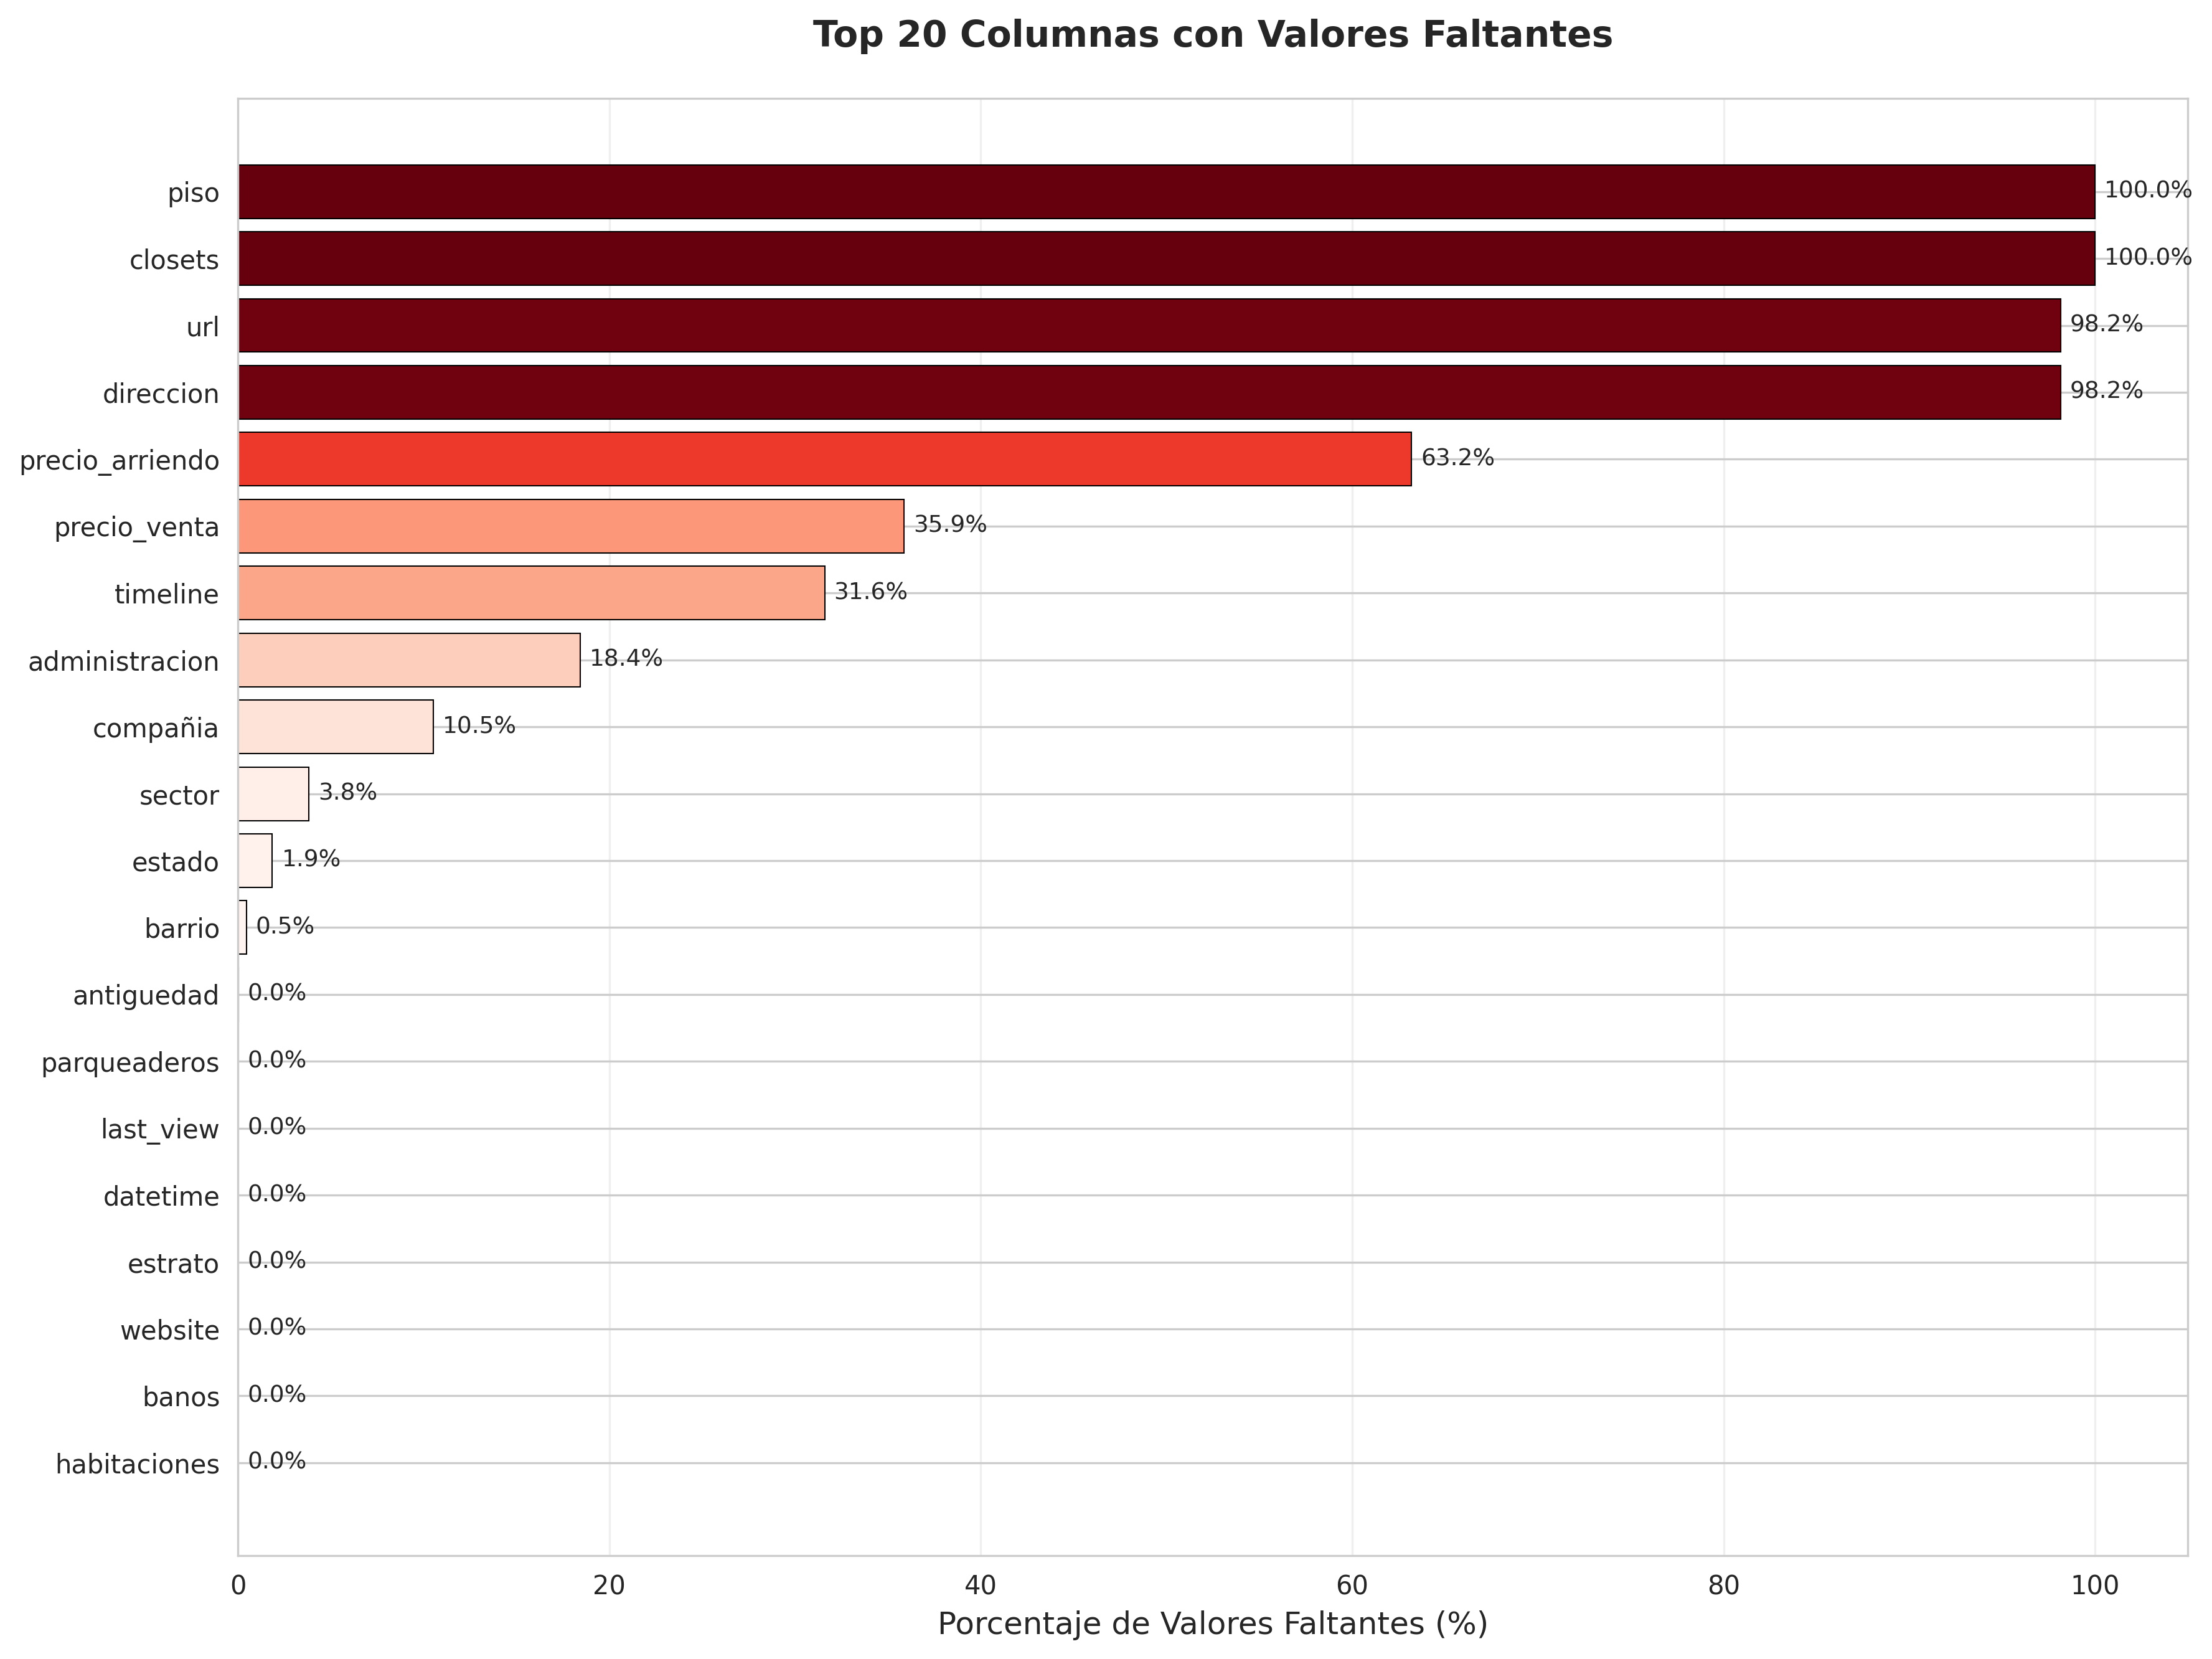

In [ ]:
# Visualizar valores faltantes si existen figuras generadas
figura_path = Path('../reports/figures/01_valores_faltantes.png')
if figura_path.exists():
    print("\nVisualización de Valores Faltantes:")
    display(Image(filename=str(figura_path)))
else:
    print("\nNota: Ejecutar src/01_analisis_exploratorio.py para generar las visualizaciones")

## 3. Análisis de la Variable Objetivo: precio_venta

La variable objetivo es `precio_venta` (precio de venta en COP). Analizaremos su distribución, estadísticas y presencia de valores atípicos.

In [ ]:
# Estadísticas descriptivas del precio de venta
stats_precio = calcular_estadisticas_basicas(df['precio_venta'], 'Precio de Venta (COP)')


Estadísticas para Precio de Venta (COP):
----------------------------------------
Conteo         : 43,013
Faltantes      : 15,429
Faltantes %    : 35.87
Media          : 2,364,794,142.84
Mediana        : 700,000,000.00
Desv. Est.     : 55,741,976,390.87
Mínimo         : 1,000,000.00
Máximo         : 4,250,000,000,000.00
Q1             : 402,900,000.00
Q3             : 1,330,000,000.00
IQR            : 927,100,000.00


In [ ]:
# Mostrar estadísticas adicionales
print("\nEstadísticas Adicionales de Precio de Venta:")
print("=" * 80)
print(f"Rango de precios: {formatear_cop(df['precio_venta'].min())} - {formatear_cop(df['precio_venta'].max())}")
print(f"Precio promedio: {formatear_cop(df['precio_venta'].mean())}")
print(f"Precio mediano: {formatear_cop(df['precio_venta'].median())}")
print(f"Desviación estándar: {formatear_cop(df['precio_venta'].std())}")


Estadísticas Adicionales de Precio de Venta:
Rango de precios: $1,000,000 - $4,250,000,000,000
Precio promedio: $2,364,794,143
Precio mediano: $700,000,000
Desviación estándar: $55,741,976,391



Distribución del Precio de Venta:


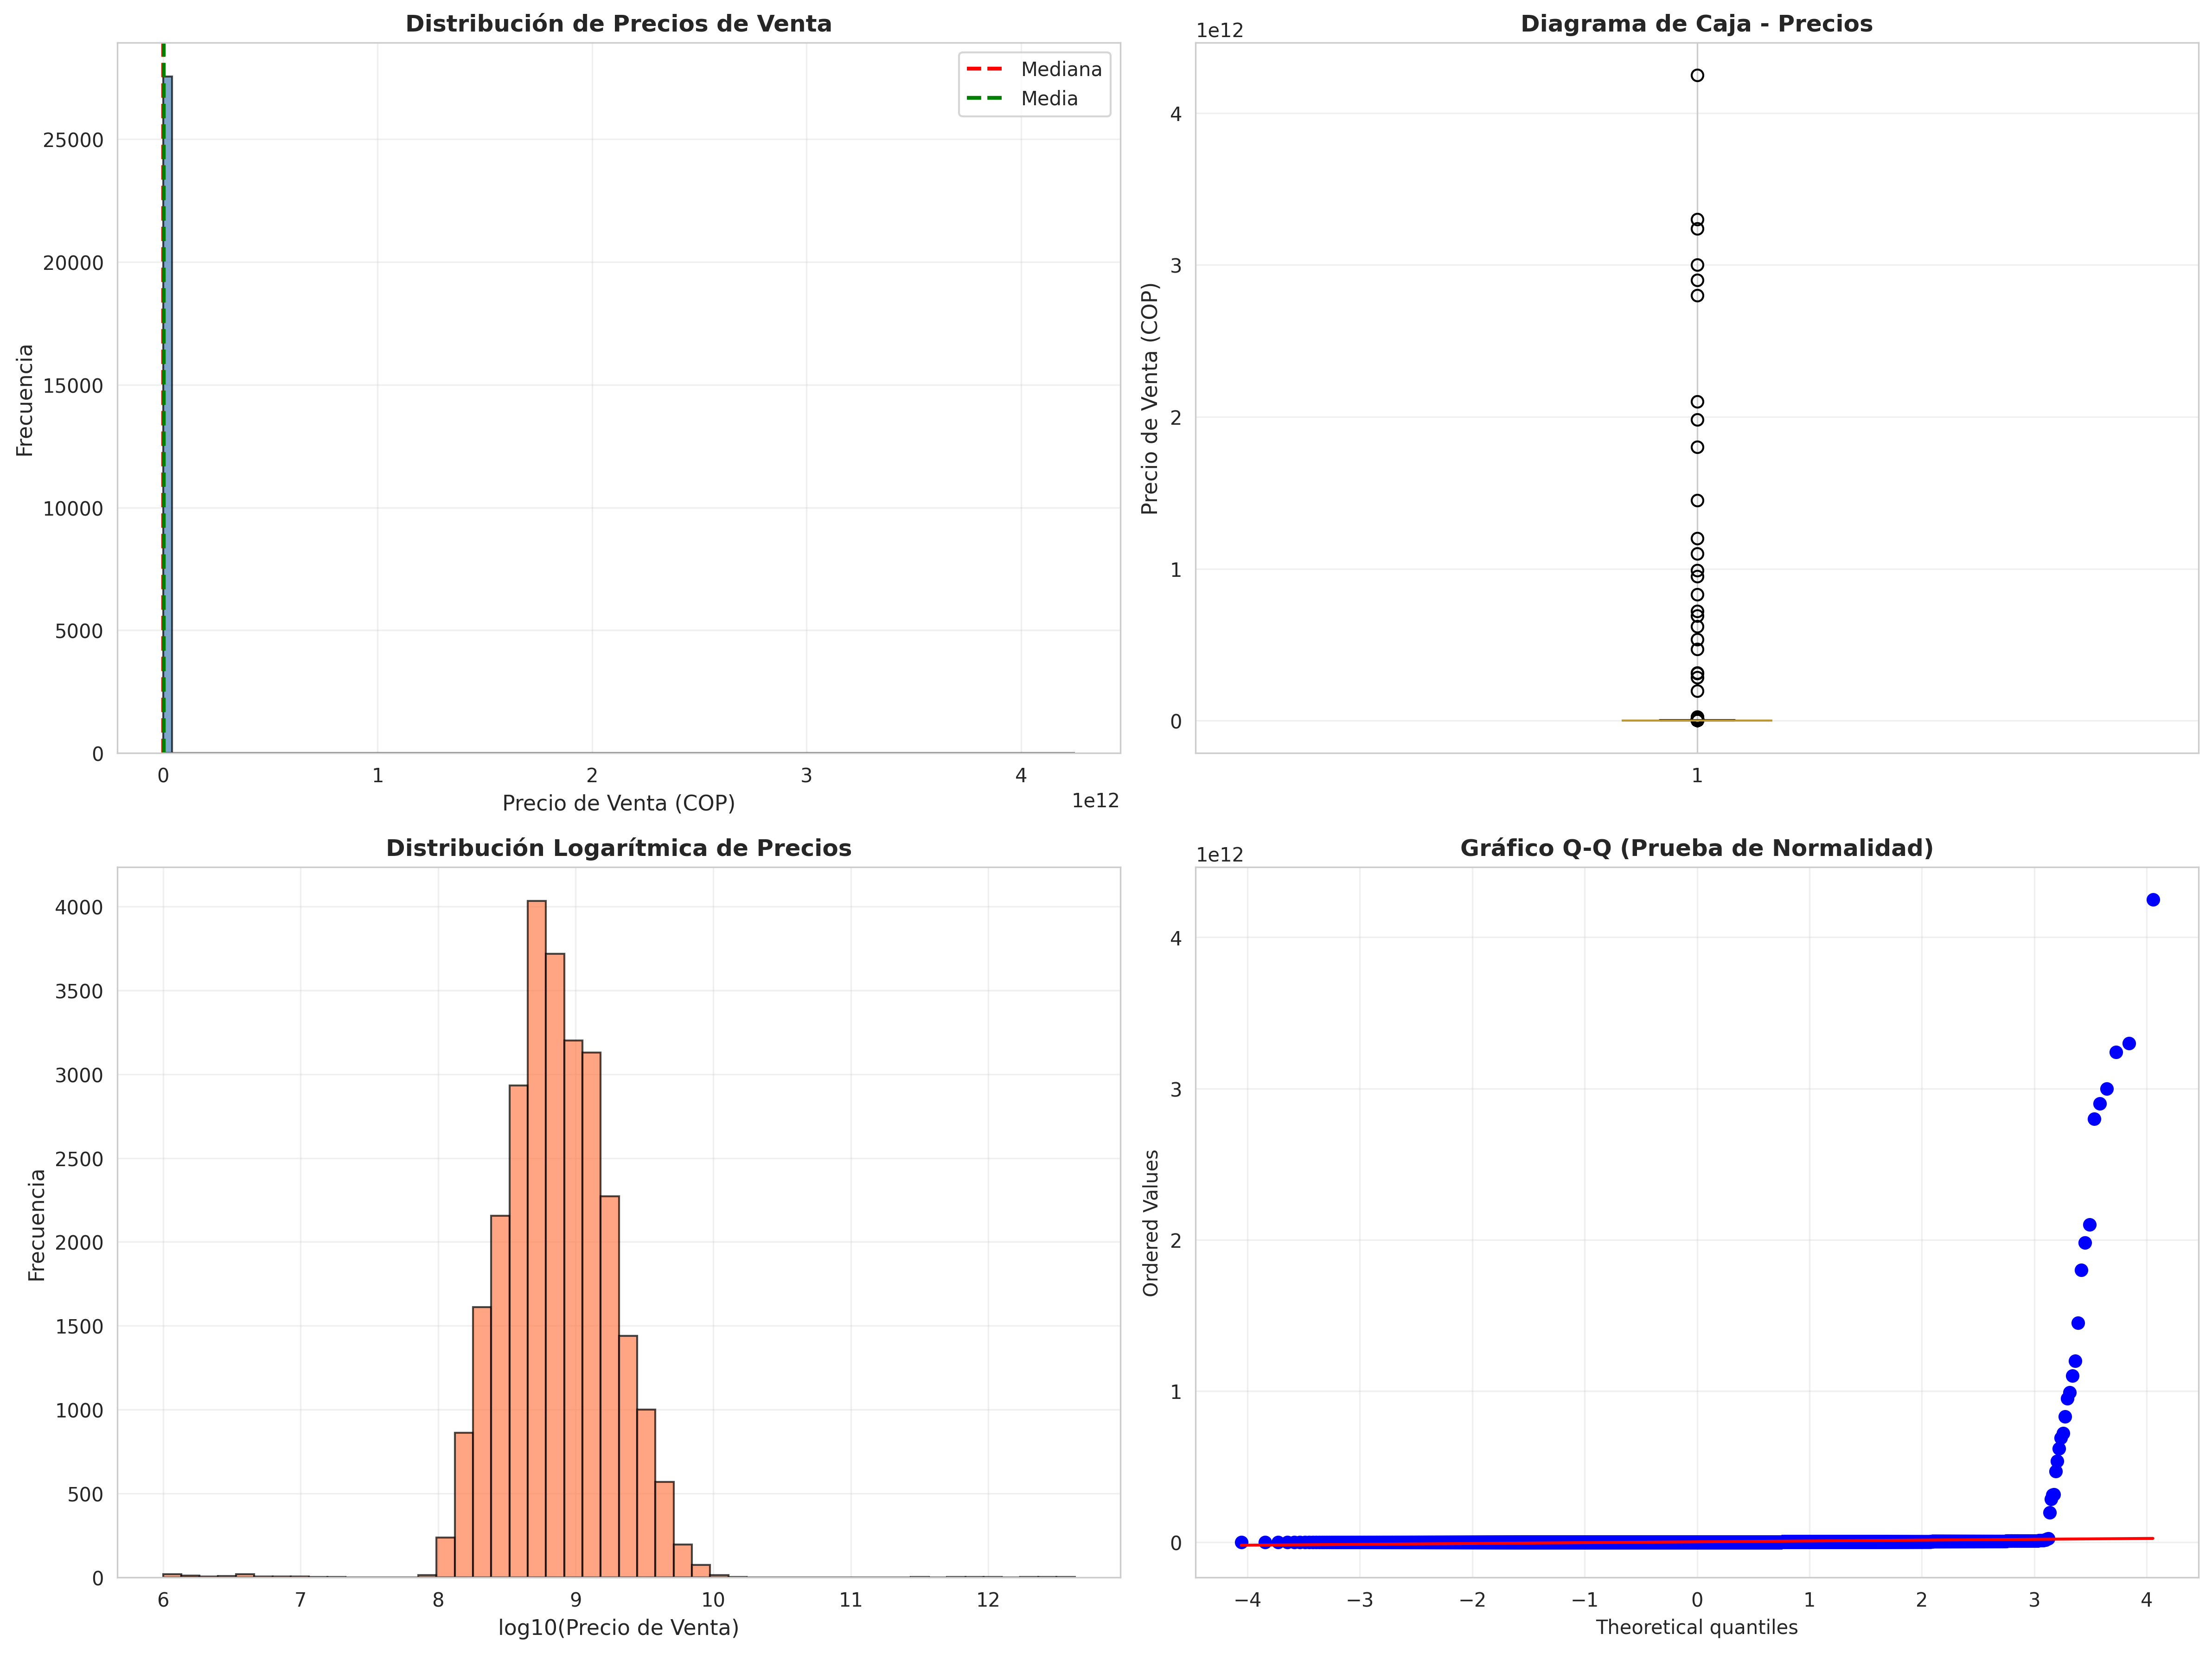

In [ ]:
# Visualización de la distribución del precio de venta
figura_precio = Path('../reports/figures/02_distribucion_precio_venta.png')
if figura_precio.exists():
    print("\nDistribución del Precio de Venta:")
    display(Image(filename=str(figura_precio)))
else:
    print("\nNota: Ejecutar src/01_analisis_exploratorio.py para generar las visualizaciones")

### Interpretación de la Variable Objetivo:

**Observaciones clave**:
- La distribución del precio está sesgada a la derecha (asimetría positiva)
- Hay presencia de valores atípicos en el rango superior
- La mayoría de los apartamentos se concentran en el rango medio
- La transformación logarítmica muestra una distribución más normal

## 4. Análisis de Características Numéricas

Analizaremos las características numéricas principales: área, habitaciones, baños, parqueaderos, etc.

In [ ]:
# Seleccionar columnas numéricas principales
columnas_numericas = ['area', 'habitaciones', 'banos', 'parqueaderos', 'piso', 'antiguedad']

# Estadísticas descriptivas
print("\nEstadísticas Descriptivas de Características Numéricas:")
print("=" * 80)
display(df[columnas_numericas].describe().T)


Estadísticas Descriptivas de Características Numéricas:


,count,mean,std,min,25%,50%,75%,max
area,43013.0,180.034060,9163.001563,0.0,63.0,100.0,174.0,1900000.0
habitaciones,43012.0,2.615340,0.850046,1.0,2.0,3.0,3.0,7.0
banos,43012.0,2.701339,1.196659,0.0,2.0,3.0,4.0,6.0
parqueaderos,43012.0,1.662862,1.114685,-2.0,1.0,2.0,2.0,30.0
piso,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Visualización de distribuciones
figura_numericas = Path('../reports/figures/03_distribucion_caracteristicas_numericas.png')
if figura_numericas.exists():
    print("\nDistribución de Características Numéricas:")
    display(Image(filename=str(figura_numericas)))
else:
    print("\nNota: Ejecutar src/01_analisis_exploratorio.py para generar las visualizaciones")


Nota: Ejecutar src/01_analisis_exploratorio.py para generar las visualizaciones


## 5. Análisis de Características Categóricas

Analizaremos las variables categóricas como localidad, tipo de propiedad, estrato, etc.

In [ ]:
# Análisis de localidades
if 'localidad' in df.columns:
    print("\nDistribución por Localidad:")
    print("=" * 80)
    localidad_counts = df['localidad'].value_counts()
    print(f"Total de localidades: {len(localidad_counts)}")
    print(f"\nTop 10 Localidades:")
    display(localidad_counts.head(10))


Distribución por Localidad:
Total de localidades: 19

Top 10 Localidades:


localidad
USAQUEN          14831
CHAPINERO        13032
SUBA              6828
FONTIBON          1645
KENNEDY           1320
ENGATIVA          1242
TEUSAQUILLO       1144
SANTA FE           671
BOSA               421
PUENTE ARANDA      325
Name: count, dtype: int64

In [ ]:
# Visualización de localidades
figura_localidades = Path('../reports/figures/04_top_localidades.png')
if figura_localidades.exists():
    print("\nTop 15 Localidades:")
    display(Image(filename=str(figura_localidades)))

In [ ]:
# Análisis de estrato socioeconómico
if 'estrato' in df.columns:
    print("\nDistribución por Estrato Socioeconómico:")
    print("=" * 80)
    estrato_counts = df['estrato'].value_counts().sort_index()
    display(estrato_counts)


Distribución por Estrato Socioeconómico:


estrato
0.0       11
1.0      105
2.0     1402
3.0     6085
4.0     8842
5.0     7556
6.0    19011
Name: count, dtype: int64

## 6. Análisis de Amenidades

Análisis de amenidades disponibles en los apartamentos (piscina, gimnasio, ascensor, etc.)

In [ ]:
# Identificar columnas de amenidades (binarias)
amenidades = ['piscina', 'gimnasio', 'ascensor', 'vigilancia', 'zona_social', 
              'salon_comunal', 'parqueadero_visitantes', 'zonas_verdes']

amenidades_disponibles = [col for col in amenidades if col in df.columns]

if amenidades_disponibles:
    print("\nDisponibilidad de Amenidades:")
    print("=" * 80)
    for amenidad in amenidades_disponibles:
        conteo = df[amenidad].sum()
        porcentaje = (conteo / len(df)) * 100
        print(f"{amenidad.capitalize():25s}: {conteo:6,} ({porcentaje:5.2f}%)")


Disponibilidad de Amenidades:
Piscina                  : 3,889.0 ( 9.04%)
Gimnasio                 : 12,697.0 (29.52%)
Ascensor                 : 27,016.0 (62.81%)
Vigilancia               : 25,264.0 (58.74%)
Salon_comunal            :    0.0 ( 0.00%)


In [ ]:
# Visualización de amenidades
figura_amenidades = Path('../reports/figures/06_disponibilidad_amenidades.png')
if figura_amenidades.exists():
    print("\nDisponibilidad de Amenidades (Visualización):")
    display(Image(filename=str(figura_amenidades)))

## 7. Análisis de Correlaciones

Analizaremos las correlaciones entre las variables numéricas y su relación con el precio de venta.

In [ ]:
# Calcular correlaciones con precio_venta
correlaciones = df.select_dtypes(include=[np.number]).corr()['precio_venta'].sort_values(ascending=False)

print("\nTop 15 Características Correlacionadas con Precio de Venta:")
print("=" * 80)
display(correlaciones.head(15))


Top 15 Características Correlacionadas con Precio de Venta:


precio_venta               1.000000
parqueaderos               0.042372
banos                      0.037329
administracion             0.026086
estrato                    0.025748
jacuzzi                    0.022872
habitaciones               0.022408
area                       0.016199
longitud                   0.014381
gimnasio                   0.013029
ascensor                   0.010463
distancia_estacion_tm_m    0.010212
distancia_parque_m         0.009693
conjunto_cerrado           0.009164
vigilancia                 0.002912
Name: precio_venta, dtype: float64

In [ ]:
# Visualización de correlaciones
figura_correlacion = Path('../reports/figures/07_correlacion_con_precio.png')
if figura_correlacion.exists():
    print("\nCorrelación con Precio de Venta (Top 20):")
    display(Image(filename=str(figura_correlacion)))

In [ ]:
# Matriz de correlación
figura_matriz = Path('../reports/figures/08_matriz_correlacion.png')
if figura_matriz.exists():
    print("\nMatriz de Correlación (Características Principales):")
    display(Image(filename=str(figura_matriz)))

### Hallazgos Clave de Correlación:

**Variables con alta correlación positiva con precio**:
- Área (m²) - La correlación más fuerte
- Número de baños
- Número de habitaciones
- Estrato socioeconómico

**Implicaciones para el modelo**:
- El área es el predictor más importante
- Las características físicas tienen fuerte influencia
- La ubicación (estrato/localidad) es determinante

## 8. Análisis Geográfico

Análisis de patrones geográficos utilizando coordenadas y localidades.

In [ ]:
# Estadísticas geográficas
if 'latitud' in df.columns and 'longitud' in df.columns:
    print("\nEstadísticas de Coordenadas:")
    print("=" * 80)
    print(f"Latitud  - Rango: {df['latitud'].min():.6f} a {df['latitud'].max():.6f}")
    print(f"Longitud - Rango: {df['longitud'].min():.6f} a {df['longitud'].max():.6f}")


Estadísticas de Coordenadas:
Latitud  - Rango: 4.468629 a 4.820822
Longitud - Rango: -74.213645 a -74.014000


In [ ]:
# Visualización geográfica
figura_geo = Path('../reports/figures/09_distribucion_geografica.png')
if figura_geo.exists():
    print("\nDistribución Geográfica de Apartamentos (coloreado por precio):")
    display(Image(filename=str(figura_geo)))

In [ ]:
# Precio promedio por localidad
figura_precio_localidad = Path('../reports/figures/10_precio_por_localidad.png')
if figura_precio_localidad.exists():
    print("\nPrecio Promedio por Localidad (Top 15):")
    display(Image(filename=str(figura_precio_localidad)))

## 9. Relación entre Precio y Características

Análisis detallado de cómo el precio varía según diferentes características.

In [ ]:
# Precio por número de habitaciones
figura_hab = Path('../reports/figures/11_precio_por_habitaciones.png')
if figura_hab.exists():
    print("\nPrecio de Venta por Número de Habitaciones:")
    display(Image(filename=str(figura_hab)))

In [ ]:
# Precio por estrato
figura_estrato = Path('../reports/figures/12_precio_por_estrato.png')
if figura_estrato.exists():
    print("\nPrecio de Venta por Estrato Socioeconómico:")
    display(Image(filename=str(figura_estrato)))

In [ ]:
# Precio por metro cuadrado
figura_m2 = Path('../reports/figures/13_precio_por_metro_cuadrado.png')
if figura_m2.exists():
    print("\nPrecio por Metro Cuadrado:")
    display(Image(filename=str(figura_m2)))

## 10. Resumen ejecutivo del EDA

### Hallazgos principales

1. **Dataset**
   - 43.013 registros y 46 variables de apartamentos en Bogotá.
   - Datos recientes (últimos ~2 meses).
   - En general, pocos valores faltantes.

2. **Variable objetivo: `precio_venta`**
   - Distribución muy asimétrica, con una cola larga de inmuebles muy costosos.
   - Presencia de valores atípicos en precio y área que conviene revisar o acotar.
   - La mediana representa mejor el comportamiento típico que la media.

3. **Variables que más influyen en el precio**
   - El área es la variable con relación más fuerte con el precio.
   - La ubicación (localidad y estrato) marca diferencias claras entre zonas caras y económicas.
   - Baños, habitaciones y parqueaderos también explican parte importante de la variación.
   - Amenidades como ascensor, piscina y gimnasio agregan valor, aunque con efecto moderado.

4. **Patrones por zona**
   - Hay una segmentación clara del precio por localidad.
   - Zonas como Usaquén y Chapinero concentran los valores más altos.
   - Localidades del sur y occidente se ubican en rangos de precio más bajos.
   - El estrato refleja bien estas diferencias entre zonas.

5. **Implicaciones para el modelado**
   - Es conveniente trabajar el precio en escala logarítmica para manejar mejor la cola de valores altos.
   - Puede ser útil incluir interacciones como área × estrato o variables derivadas por segmento.
   - Las variables categóricas (localidad, barrio, estado, etc.) requieren codificación antes del modelado.

